In [1]:
pip install python-docx

Note: you may need to restart the kernel to use updated packages.


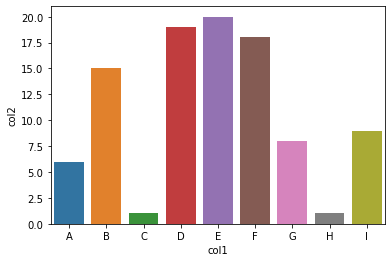

In [16]:
# exemplo gráfico
import pandas as pd
import seaborn as sns
    
dados = [['A', 6, 15], ['B', 15, 14], ['C', 1, 14], ['D', 19, 16], ['E', 20, 3], 
        ['F', 18, 7], ['G', 8, 10], ['H', 1, 3], ['I', 9, 11]]
df = pd.DataFrame(dados, columns=['col1', 'col2', 'col3'])

# salvar gráfico como png
plot = sns.barplot(data=df, x='col1', y='col2')
plot.get_figure().savefig('Grafico1.png')

In [17]:
# exemplo tabela
df = pd.read_excel('Erros de imunizações abaixo 18 anos.xlsx')
total = df[['Idade Evento', 'Município da Notificação']]
total = total[total['Município da Notificação'] == 'Porto Alegre']
total = total[total['Idade Evento'] == 16].reset_index(drop=True)
total

,Idade Evento,Município da Notificação
0,16,Porto Alegre
1,16,Porto Alegre
2,16,Porto Alegre
3,16,Porto Alegre
4,16,Porto Alegre
5,16,Porto Alegre
6,16,Porto Alegre
7,16,Porto Alegre
8,16,Porto Alegre
9,16,Porto Alegre


In [10]:
from datetime import date
data_hoje = date.today().strftime('%d/%m/%Y')

In [19]:
#GERAR DOCX
from docx import Document
from docx.shared import Inches

from docx.enum.style import WD_STYLE_TYPE
from docx.enum.table import WD_TABLE_ALIGNMENT
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.enum.section import WD_ORIENT
from docx.enum.section import WD_SECTION
from docx.shared import Pt
from docx.shared import Inches

document = Document()

# Orientação da página - Paisagem
section = document.sections[-1]
section.orientation = WD_ORIENT.LANDSCAPE
new_width, new_height = section.page_height, section.page_width
section.page_width = new_width
section.page_height = new_height

styles = document.styles
#estilo do paragrafo
p = styles.add_style('Paragraph1', WD_STYLE_TYPE.PARAGRAPH)
p.font.name = 'Calibri'
p.font.size = Pt(14)

p = styles.add_style('Paragraph2', WD_STYLE_TYPE.PARAGRAPH)
p.font.name = 'Calibri'
p.font.size = Pt(18)

p = styles.add_style('Paragraph3', WD_STYLE_TYPE.PARAGRAPH)
p.font.name = 'Calibri'
p.font.size = Pt(11)

#texto
p1 = document.add_paragraph('SES/RS SECRETARIA DA SAÚDE DO ESTADO DO RIO GRANDE DO SUL\nCEVS – CENTRO ESTADUAL DE VIGILÂNCIA EM SAÚDE\nDivisão de Vigilância Epidemiológica', style='Paragraph1')
p1.alignment = WD_ALIGN_PARAGRAPH.CENTER

se_periodo = '39 a 48'
p2 = document.add_paragraph(f'\n\n\n\nPercentual de vacinados em hospitalizados e óbitos por SRAG COVID-19, RS\nSemanas Epidemiológicas {se_periodo} / 2021\nTABELAS E GRÁFICOS\n\n\n', style='Paragraph2')
p2.alignment = WD_ALIGN_PARAGRAPH.CENTER

p3 = document.add_paragraph(f'Elaboração: Paola Lucca Pizutti e Natanael de Campos Klein', style='Paragraph1')
p3.alignment = WD_ALIGN_PARAGRAPH.CENTER

p4 = document.add_paragraph(f'\n\n\nPorto Alegre, RS, {data_hoje}', style='Paragraph3')
p4.alignment = WD_ALIGN_PARAGRAPH.CENTER

#nova página
document.add_page_break()

#gráfico
document.add_picture('Grafico1', width=Inches(8.25))

document.save('doc.docx')

AttributeError: 'AxesSubplot' object has no attribute 'seek'

In [18]:
#tabela
total1 = [
    [5, 'Porto Alegre'],
    [9, 'Novo Hamburgo']
]

tabela = document.add_table(rows=1,cols=2)
titulo_tabela = tabela.rows[0].cells
titulo_tabela[0].text = "Idade Evento"
titulo_tabela[1].text = "Município da Notificação"

for idade, municipio in total:
    linha = tabela.add_row().cells
    linha[0].text = str(idade)
    linha[1].text = municipio

ValueError: too many values to unpack (expected 2)

In [ ]:
# POSSÍVEIS SOLUÇÕES
# Transformar em lista
# preciso desempacotar